In [71]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
from fastai.vision import *

In [73]:
mnist = untar_data(URLs.MNIST_TINY)

In [76]:
data = (ImageImageList.from_folder(mnist/'train')
        .split_by_rand_pct(0.1, seed=42)
        .label_from_func(lambda x: x)
        .transform(tfms)
        .databunch(num_workers=0, bs=16)
        .normalize(do_y=True))

In [77]:
data

ImageDataBunch;

Train: LabelList (639 items)
x: ImageImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\C64062\.fastai\data\mnist_tiny\train;

Valid: LabelList (70 items)
x: ImageImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\C64062\.fastai\data\mnist_tiny\train;

Test: None

In [78]:
from vae import *

In [112]:
vae = VAE(28, 2)
my_learner = Learner(data,
                     vae,
                     opt_func=torch.optim.Adam,
                     loss_func=vae.vae_loss_function)

28 2


In [113]:
my_learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


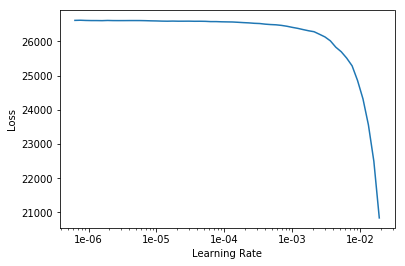

In [114]:
my_learner.recorder.plot()

In [115]:
my_learner.fit(5, 1e-2)

epoch,train_loss,valid_loss,time
0,-171495.718750,-456062.125000,00:03
1,-468146.531250,-616749.875000,00:03
2,-575420.250000,-626197.812500,00:03
3,-623644.500000,-641352.250000,00:03
4,-653817.437500,-654863.687500,00:03


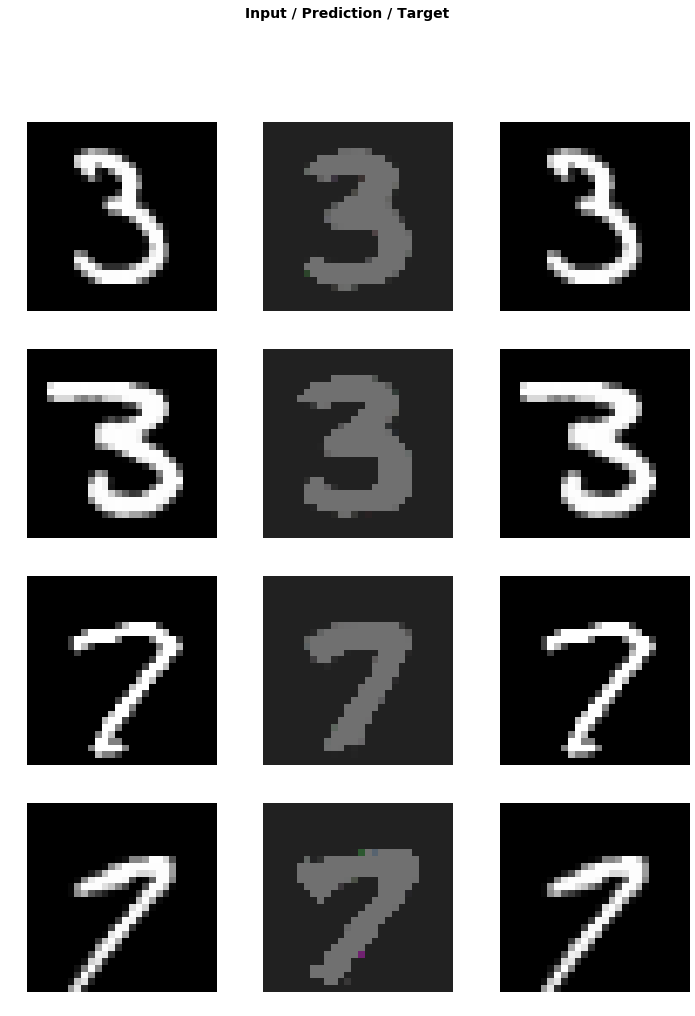

In [116]:
my_learner.show_results(rows=4)

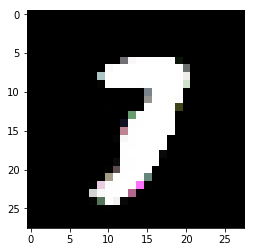

In [156]:
sample = torch.randn(64, 2)
epoch = 5
sample = vae.decode(sample).cpu()
plt.imshow(sample[0].permute(1, 2, 0))

In [149]:
emb = vae.encode(data.one_batch()[0])

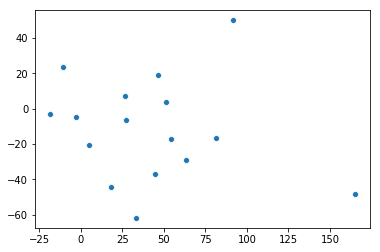

In [152]:
import seaborn as sns
sns.scatterplot(x=emb[0][:, 0], y=emb[0][:, 1])